In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import math

/home/rodrigo/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
files=["control_ta"]
dfs=[]
for f in files:
    dfs.append(pd.read_csv(f"ablation_results/{f}.csv"))
df = pd.concat(dfs,sort=False)

df["abs_freq_error"]=abs(df["freq_error"])
df["abs_phase_error"]=abs(df["phase_error"])
df["abs_freq_error_std"]=df["abs_freq_error"]
df["abs_phase_error_std"]=df["abs_phase_error"]

In [9]:
df["model"].unique()

array(['base', 'multiple', 'single', 'complex'], dtype=object)

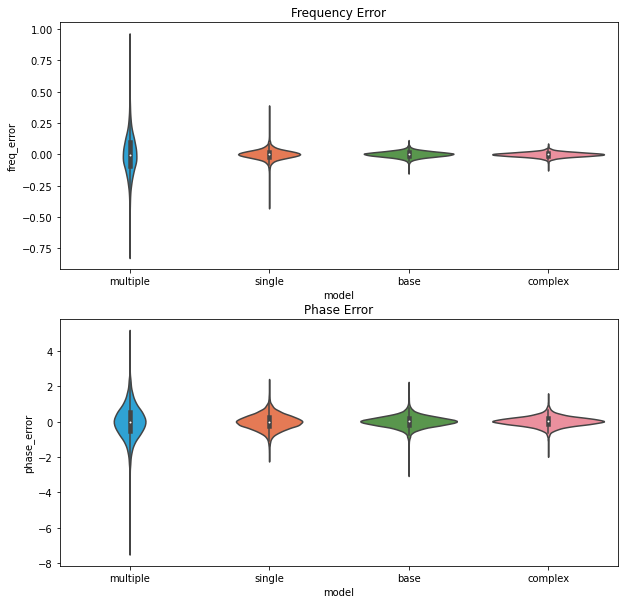

In [12]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
#fig.tight_layout()

models = ["base","multiple","single","complex"]
model_labels = ["base","multiple","single","complex"]
colors = ['seagreen','dodgerblue','coral',"red"]
#markers = ['o','^','s',]
title_texts=[""]
colour_palette = {"base": "#51A241", "multiple": "#13ADF0", "single": "#FD6E3D","complex": "#FA8194"}

order_dict={"base":3,"multiple":1,"single":2,"complex":4}

df = df[df["model"].isin(order_dict.keys())]


i_df = df.copy()
i_df['order']=i_df.apply(lambda x: order_dict[x['model']],axis=1)
i_df = i_df.sort_values("order")
sns.violinplot(data=i_df, x='model', y='freq_error', palette=colour_palette, ax=ax[0]).set(title=f'Frequency Error')
sns.violinplot(data=i_df, x='model', y='phase_error', palette=colour_palette, ax=ax[1]).set(title=f'Phase Error')

plt.show()